In [1]:
import numpy as np
import matplotlib.pyplot as plt

##  Données jouets

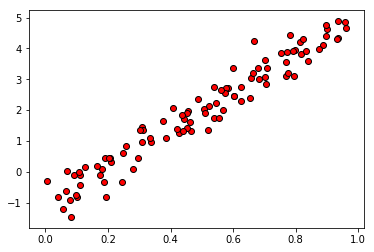

In [126]:
a = 6.
b = -1.
N = 100
sig = .4 # écart type

x = []
y = []
for i in range(N):
    xi = np.random.rand()
    x.append(xi)
    eps = sig*np.random.randn()
    y.append(a*xi + b + eps)

plt.scatter(x,y,c='r',edgecolors='k')
plt.show()

##  Validation des formules analytiques

#### Estimation de paramètres probabilistes

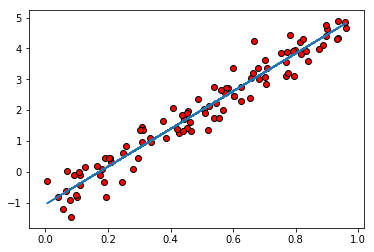

In [127]:
a_pb = np.cov(x,y)[0][1]/np.var(x)
b_pb = np.mean(y) - (np.cov(x,y)[0][1]/np.var(x))*np.mean(x)

y_pb = []
for i in range(N):
    y_pb.append(a_pb*x[i] + b_pb)

plt.scatter(x,y,c='r',edgecolors='k')
plt.plot(x,y_pb)
plt.show()

### Formulation au sens des moindres carrés

#### En ajoutant un biais

In [129]:
x = np.array(x)

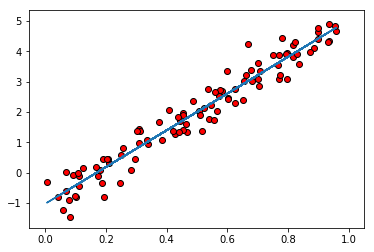

In [130]:
X = np.hstack((x.reshape(N,1),np.ones((N,1))))
A = np.dot(X.T,X)
B = np.dot(X.T,y)
w = np.linalg.solve(A,B)

y_mc = []
for i in range(N):
    y_mc.append(w[0]*X[i] + w[1])
y_mc = np.array(y_mc)

plt.scatter(x,y,c='r',edgecolors='k')
plt.plot(X,y_mc)
plt.show()

#### Sans ajouter de biais

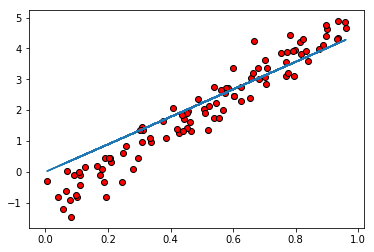

In [136]:
A = np.dot(x.T,x)
B = np.dot(x.T,y)
w = [B/A]
y_mc = []
for i in range(N):
    y_mc.append(w[0]*x[i])
y_mc = np.array(y_mc)


plt.scatter(x,y,c='r',edgecolors='k')
plt.plot(x,y_mc)
plt.show()

On observe que si l'on ajoute pas de biais dans X, la droite de régression linéaire passe par l'origine du repère et ne représente plus l'échantillon correctement.

### Optimisation par descente de gradient

Testons l'algorithme pour différentes valeurs d'epsilon

In [52]:
wstar = np.linalg.solve(X.T.dot(X), X.T.dot(y)) # pour se rappeler du w optimal

print("w* =",wstar,"\n")

eps = 5e-3
nIterations = 30
w = np.zeros(X.shape[1]) # init à 0
allw = [w]
for i in range(nIterations):
    g = X.T.dot((X.dot(w) - y))
    w = w - eps*g
    allw.append(w)
    print("w =",w)
    
allw = np.array(allw)

w* = [ 5.78878662 -0.9027625 ] 

w = [0.66559527 0.90792988]
w = [1.01708803 1.20560109]
w = [1.24539594 1.27189987]
w = [1.42352422 1.25143847]
w = [1.57945296 1.19938004]
w = [1.72396715 1.13673596]
w = [1.86128295 1.07147939]
w = [1.99310508 1.00660689]
w = [2.12017621 0.94321643]
w = [2.24286857 0.88168262]
w = [2.36141001 0.82210534]
w = [2.47597038 0.76448104]
w = [2.58669462 0.70876806]
w = [2.69371547 0.65491153]
w = [2.79715844 0.60285284]
w = [2.89714378 0.55253323]
w = [2.99378728 0.50389507]
w = [3.08720074 0.45688236]
w = [3.17749215 0.41144084]
w = [3.26476586 0.36751804]
w = [3.34912274 0.3250632 ]
w = [3.43066028 0.28402727]
w = [3.5094727  0.24436283]
w = [3.58565107 0.20602404]
w = [3.65928345 0.16896659]
w = [3.73045491 0.13314766]
w = [3.7992477  0.09852586]
w = [3.86574133 0.06506117]
w = [3.93001263 0.03271493]
w = [3.99213588e+00 1.44975255e-03]


In [53]:
wstar = np.linalg.solve(X.T.dot(X), X.T.dot(y)) # pour se rappeler du w optimal

print("w* =",wstar,"\n")

eps = 1e-1
nIterations = 30
w = np.zeros(X.shape[1]) # init à 0
allw = [w]
for i in range(nIterations):
    g = X.T.dot((X.dot(w) - y))
    w = w - eps*g
    allw.append(w)
    print("w =",w)

allw = np.array(allw)

w* = [ 5.78878662 -0.9027625 ] 

w = [13.31190537 18.15859756]
w = [ -99.01719034 -207.78627255]
w = [1190.35387871 2353.2553645 ]
w = [-13457.22046582 -26751.46932686]
w = [152992.90215208 303981.32655667]
w = [-1738473.86912924 -3454323.43666909]
w = [19755337.05029042 39253427.20943779]
w = [-2.24491039e+08 -4.46058990e+08]
w = [2.55101920e+09 5.06882153e+09]
w = [-2.89886794e+10 -5.75998968e+10]
w = [3.29414821e+11 6.54540328e+11]
w = [-3.74332763e+12 -7.43791335e+12]
w = [4.25375571e+13 8.45212322e+13]
w = [-4.83378411e+14 -9.60462746e+14]
w = [5.49290332e+15 1.09142835e+16]
w = [-6.24189789e+16 -1.24025199e+17]
w = [7.09302294e+17 1.40936875e+18]
w = [-8.06020466e+18 -1.60154573e+19]
w = [9.15926815e+19 1.81992734e+20]
w = [-1.04081964e+21 -2.06808675e+21]
w = [1.18274245e+22 2.35008439e+22]
w = [-1.34401739e+23 -2.67053431e+23]
w = [1.52728326e+24 3.03467976e+24]
w = [-1.73553868e+25 -3.44847889e+25]
w = [1.97219114e+26 3.91870235e+26]
w = [-2.24111276e+27 -4.45304395e+27]
w = [

In [54]:
wstar = np.linalg.solve(X.T.dot(X), X.T.dot(y)) # pour se rappeler du w optimal

print("w* =",wstar,"\n")

eps = 1e-2
nIterations = 30
w = np.zeros(X.shape[1]) # init à 0
allw = [w]
for i in range(nIterations):
    g = X.T.dot((X.dot(w) - y))
    w = w - eps*g
    allw.append(w)
    print("w =",w)

allw = np.array(allw)

w* = [ 5.78878662 -0.9027625 ] 

w = [1.33119054 1.81585976]
w = [1.40597106 1.19068484]
w = [1.75168274 1.15556521]
w = [2.00906807 0.99320658]
w = [2.26466361 0.87232918]
w = [2.49953094 0.75229233]
w = [2.71956012 0.64199019]
w = [2.92467829 0.53865658]
w = [3.1161338  0.44232571]
w = [3.29478044 0.35241132]
w = [3.46148844 0.26851244]
w = [3.6170525  0.19022037]
w = [3.7622183 0.1171619]
w = [3.89768071 0.04898682]
w = [ 4.02408838 -0.01463119]
w = [ 4.14204655 -0.07399678]
w = [ 4.25212002 -0.12939418]
w = [ 4.35483581 -0.18108863]
w = [ 4.45068575 -0.22932766]
w = [ 4.54012876 -0.27434223]
w = [ 4.62359311 -0.31634789]
w = [ 4.70147844 -0.35554575]
w = [ 4.77415765 -0.3921235 ]
w = [ 4.84197876 -0.42625627]
w = [ 4.90526647 -0.4581075 ]
w = [ 4.96432383 -0.48782968]
w = [ 5.01943361 -0.51556514]
w = [ 5.07085967 -0.54144667]
w = [ 5.11884824 -0.5655982 ]
w = [ 5.1636291  -0.58813536]


Testons à présent l'algorithme pour différentes initialisations du vecteur w

In [55]:
wstar = np.linalg.solve(X.T.dot(X), X.T.dot(y)) # pour se rappeler du w optimal

print("w* =",wstar,"\n")

eps = 1e-2
nIterations = 30
w = np.random.random(X.shape[1])*10 # initialisation avec des valeurs aléatoires comprises entre 0 et 10
allw = [w]
for i in range(nIterations):
    g = X.T.dot((X.dot(w) - y))
    w = w - eps*g
    allw.append(w)
    print("w =",w)

allw = np.array(allw)

w* = [ 5.78878662 -0.9027625 ] 

w = [0.50751611 0.46355991]
w = [1.46712336 1.57751195]
w = [1.61262574 1.1268459 ]
w = [1.92566078 1.05851275]
w = [2.17587529 0.91150024]
w = [2.41926711 0.79399052]
w = [2.64404931 0.67968497]
w = [2.85435954 0.57411917]
w = [3.05048119 0.47534993]
w = [3.23352434 0.38324415]
w = [3.40432499 0.29728051]
w = [3.56371049 0.21706639]
w = [3.71244174 0.14221323]
w = [3.8512314  0.07236369]
w = [3.98074389 0.00718307]
w = [ 4.10159935 -0.05364065]
w = [ 4.21437644 -0.11039872]
w = [ 4.31961513 -0.16336289]
w = [ 4.41781933 -0.21278676]
w = [ 4.50945925 -0.25890699]
w = [ 4.59497365 -0.30194438]
w = [ 4.67477199 -0.34210502]
w = [ 4.74923635 -0.37958119]
w = [ 4.81872328 -0.41455233]
w = [ 4.88356547 -0.44718589]
w = [ 4.94407339 -0.47763811]
w = [ 5.00053677 -0.50605481]
w = [ 5.05322596 -0.53257204]
w = [ 5.10239322 -0.55731677]
w = [ 5.14827399 -0.58040749]


In [56]:
wstar = np.linalg.solve(X.T.dot(X), X.T.dot(y)) # pour se rappeler du w optimal

print("w* =",wstar,"\n")

eps = 1e-2
nIterations = 30
w = np.random.random(X.shape[1])*10 # initialisation avec des valeurs aléatoires comprises entre 0 et 10
allw = [w]
for i in range(nIterations):
    g = X.T.dot((X.dot(w) - y))
    w = w - eps*g
    allw.append(w)
    print("w =",w)

allw = np.array(allw)

w* = [ 5.78878662 -0.9027625 ] 

w = [ 3.46991984 -0.64908074]
w = [4.05386223 0.18626069]
w = [ 4.06844692 -0.08797965]
w = [ 4.20740265 -0.09482914]
w = [ 4.30744377 -0.16008775]
w = [ 4.40780021 -0.20707066]
w = [ 4.49979343 -0.25420164]
w = [ 4.58602871 -0.29740497]
w = [ 4.66640729 -0.33790416]
w = [ 4.74143495 -0.37565282]
w = [ 4.81144236 -0.41088851]
w = [ 4.87677146 -0.4437665 ]
w = [ 4.93773346 -0.4744474 ]
w = [ 4.99462064 -0.50307735]
w = [ 5.04770527 -0.52979361]
w = [ 5.09724156 -0.55472406]
w = [ 5.14346668 -0.57798808]
w = [ 5.18660197 -0.59969706]
w = [ 5.22685395 -0.61995494]
w = [ 5.26441536 -0.63885872]
w = [ 5.29946604 -0.65649891]
w = [ 5.33217382 -0.67295997]
w = [ 5.3626953  -0.68832071]
w = [ 5.39117663 -0.7026547 ]
w = [ 5.41775418 -0.71603056]
w = [ 5.44255519 -0.72851233]
w = [ 5.46569843 -0.74015978]
w = [ 5.48729469 -0.75102867]
w = [ 5.50744739 -0.76117105]
w = [ 5.52625302 -0.77063549]


In [57]:
wstar = np.linalg.solve(X.T.dot(X), X.T.dot(y)) # pour se rappeler du w optimal

print("w* =",wstar,"\n")

eps = 1e-2
nIterations = 30
w = np.random.random(X.shape[1])*10 # initialisation avec des valeurs aléatoires comprises entre 0 et 10
allw = [w]
for i in range(nIterations):
    g = X.T.dot((X.dot(w) - y))
    w = w - eps*g
    allw.append(w)
    print("w =",w)

allw = np.array(allw)

w* = [ 5.78878662 -0.9027625 ] 

w = [ 4.08684172 -2.08540444]
w = [ 5.15828262 -0.103468  ]
w = [ 4.97407403 -0.60665516]
w = [ 5.08203226 -0.52014418]
w = [ 5.11662889 -0.57084525]
w = [ 5.16454686 -0.58709307]
w = [ 5.20556666 -0.60959707]
w = [ 5.24471795 -0.62886144]
w = [ 5.2810458  -0.64724829]
w = [ 5.31499418 -0.66430916]
w = [ 5.3466618  -0.68025254]
w = [ 5.37621538 -0.69512479]
w = [ 5.40379286 -0.70900422]
w = [ 5.42952713 -0.72195559]
w = [ 5.4535412  -0.73404133]
w = [ 5.47595009 -0.7453192 ]
w = [ 5.4968611  -0.75584322]
w = [ 5.51637435 -0.76566378]
w = [ 5.53458328 -0.77482791]
w = [ 5.55157505 -0.78337947]
w = [ 5.56743105 -0.79135942]
w = [ 5.58222717 -0.79880597]
w = [ 5.59603428 -0.80575476]
w = [ 5.60891847 -0.81223907]
w = [ 5.62094145 -0.81828995]
w = [ 5.63216076 -0.82393637]
w = [ 5.64263015 -0.82920537]
w = [ 5.65239972 -0.83412216]
w = [ 5.66151626 -0.83871031]
w = [ 5.67002343 -0.84299176]


L'algorithme semble très sensible au choix des paramètres d'entrée (epsilon et vecteur w initial). Cependant lorsque ces paramètres sont bien choisis on converge toujours vers w*.

In [58]:
wstar = np.linalg.solve(X.T.dot(X), X.T.dot(y)) # pour se rappeler du w optimal

print("w* =",wstar,"\n")

eps = 5e-3
nIterations = 30
w = np.zeros(X.shape[1]) # init à 0
allw = [w]
for i in range(nIterations):
    g = X.T.dot((X.dot(w) - y))
    w = w - eps*g
    allw.append(w)
    print("w =",w)

allw = np.array(allw)

w* = [ 5.78878662 -0.9027625 ] 

w = [0.66559527 0.90792988]
w = [1.01708803 1.20560109]
w = [1.24539594 1.27189987]
w = [1.42352422 1.25143847]
w = [1.57945296 1.19938004]
w = [1.72396715 1.13673596]
w = [1.86128295 1.07147939]
w = [1.99310508 1.00660689]
w = [2.12017621 0.94321643]
w = [2.24286857 0.88168262]
w = [2.36141001 0.82210534]
w = [2.47597038 0.76448104]
w = [2.58669462 0.70876806]
w = [2.69371547 0.65491153]
w = [2.79715844 0.60285284]
w = [2.89714378 0.55253323]
w = [2.99378728 0.50389507]
w = [3.08720074 0.45688236]
w = [3.17749215 0.41144084]
w = [3.26476586 0.36751804]
w = [3.34912274 0.3250632 ]
w = [3.43066028 0.28402727]
w = [3.5094727  0.24436283]
w = [3.58565107 0.20602404]
w = [3.65928345 0.16896659]
w = [3.73045491 0.13314766]
w = [3.7992477  0.09852586]
w = [3.86574133 0.06506117]
w = [3.93001263 0.03271493]
w = [3.99213588e+00 1.44975255e-03]


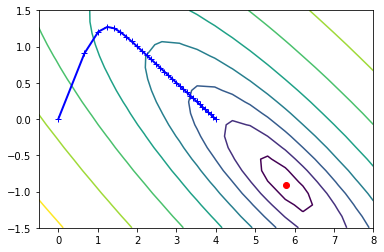

In [59]:
ngrid = 20
w1range = np.linspace(-0.5, 8, ngrid)
w2range = np.linspace(-1.5, 1.5, ngrid)
w1,w2 = np.meshgrid(w1range,w2range)

cost = np.array([[np.log(((X.dot(np.array([w1i,w2j]))-y)**2).sum()) for w1i in w1range] for w2j in w2range])

plt.figure()
plt.contour(w1, w2, cost)
plt.scatter(wstar[0], wstar[1],c='r')
plt.plot(allw[:,0],allw[:,1],'b+-' ,lw=2 )
plt.show()

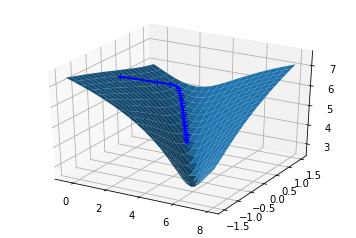

In [60]:
from mpl_toolkits.mplot3d import Axes3D

costPath = np.array([np.log(((X.dot(wtmp)-y)**2).sum()) for wtmp in allw])
costOpt  = np.log(((X.dot(wstar)-y)**2).sum())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w1, w2, cost, rstride = 1, cstride=1 )
ax.scatter(wstar[0], wstar[1],costOpt, c='r')
ax.plot(allw[:,0],allw[:,1],costPath, 'b+-' ,lw=2 )
plt.show()

##  Extension non-linéaire (solution analytique)

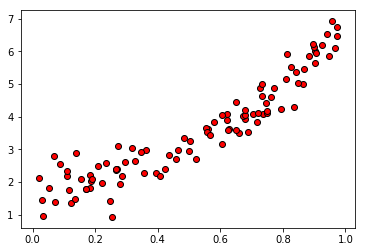

In [171]:
a = 6.
b = -1.
c = 2.
N = 100
sig = .4 # écart type

x = []
yquad = []
for i in range(N):
    xi = np.random.rand()
    x.append(xi)
    eps = sig*np.random.randn()
    yquad.append(a*xi**2 + b*xi + c + eps)

plt.scatter(x,yquad,c='r',edgecolors='k')
plt.show()

In [172]:
x = np.array(x)
x_2 = np.array([xi**2 for xi in x])

In [173]:
Xe = np.hstack((x_2.reshape(N,1),x.reshape(N,1),np.ones((N,1))))
w = np.linalg.solve(Xe.T.dot(Xe), Xe.T.dot(yquad))

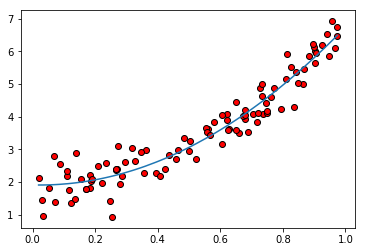

In [174]:
yquad_mc = np.dot(Xe,w)

plt.scatter(x,yquad,c='r',edgecolors='k')
plt.plot(sorted(x),sorted(yquad_mc))
plt.show()

Erreur moyenne de reconstruction :

In [175]:
e = sum([(yquad_mc[i] - yquad[i])**2 for i in range(N)])/N
e

0.1721436941862466

##  Données réelles

In [272]:
data = np.loadtxt("winequality-red.csv", delimiter=";", skiprows=1)
N,d = data.shape # extraction des dimensions
pcTrain  = 0.7 # 70% des données en apprentissage
allindex = np.random.permutation(N)
indTrain = allindex[:int(pcTrain*N)]
indTest = allindex[int(pcTrain*N):]
X = data[indTrain,:-1] # pas la dernière colonne (= note à prédire)
Y = data[indTrain,-1]  # dernière colonne (= note à prédire)
# Echantillon de test (pour la validation des résultats)
XT = data[indTest,:-1] # pas la dernière colonne (= note à prédire)
YT = data[indTest,-1]  # dernière colonne (= note à prédire)

In [273]:
wstar = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
print("w* =",wstar)

w* = [-2.51552367e-02 -1.01364440e+00 -1.39735315e-01  9.19547203e-04
 -1.98982605e+00  2.50438200e-03 -3.12853993e-03  5.47760440e+00
 -7.54152139e-01  8.95092520e-01  3.00981292e-01]


Erreur moyenne de prédiction :

In [274]:
e = np.dot((np.dot(XT,wstar) - YT).T,np.dot(XT,wstar)-YT)/len(YT)
e

0.4196140140269573

Nombre de fois où l'on trouve la note exacte :

In [275]:
yr = np.dot(X,wstar)
nb_e = 0 
for i in range(len(YT)):
    if round(yr[i]) == YT[i]:
        nb_e += 1
nb_e

192

## Optimisation par descente de gradient stochastique

In [282]:
wstar = np.linalg.solve(X.T.dot(X), X.T.dot(Y)) # pour se rappeler du w optimal

print("w* =",wstar,"\n")

eps = 5e-3
nIterations = 100
w = np.zeros(X.shape[1]) # init à 0
allw = [w]
for i in range(nIterations):
    i = np.random.randint(len(X))
    g = X[i].T.dot((X[i].dot(w) - Y[i]))
    w = w - eps*g
    allw.append(w)
    print("w =",w)

allw = np.array(allw)

w* = [-2.51552367e-02 -1.01364440e+00 -1.39735315e-01  9.19547203e-04
 -1.98982605e+00  2.50438200e-03 -3.12853993e-03  5.47760440e+00
 -7.54152139e-01  8.95092520e-01  3.00981292e-01] 

w = [0.162     0.0174    0.0024    0.057     0.00177   0.6       0.93
 0.0298452 0.105     0.0192    0.306    ]
w = [-0.79105954 -0.05067568 -0.01666119 -0.18807245 -0.00884981 -0.76151363
 -2.20148135 -0.10581057 -0.37561431 -0.06385233 -1.10997418]
w = [11.05721261  0.27617321  0.54511033  2.67185531  0.07388382 34.98758339
 66.23250438  0.91579648  3.01544289  0.87583822  9.92117576]
w = [-3.52187985e+02 -1.82896925e+01 -8.73782250e+00 -1.10337762e+02
 -3.63928932e+00 -1.09510859e+03 -4.13126756e+03 -3.93761681e+01
 -1.22102348e+02 -2.17260852e+01 -3.61396138e+02]
w = [1.16964821e+04 1.30523846e+03 3.56373391e+02 1.41289996e+04
 1.29626304e+02 5.18460174e+04 1.40087662e+05 1.78198112e+03
 5.88397712e+03 9.64074192e+02 1.64337197e+04]
w = [ -267803.90151829   -24749.88204647    -4380.92124582   -9009